In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

plt.style.use("classic")

$\text{삶의 만족도} = \theta_0 + \theta_1 \times \text{1인당\_GDP}$

여기서 $\theta_0 과 \theta_1$ 은 모델의 파라미터이다. 

---

#### $\hat{y} = \theta_0 + \theta_1 \times x_1 + \theta_2 \times x_2 + \cdots + \theta_n \times x_n$

- $\hat{y}$ 는 예측값이다.

- $n$ 은 특성의 수입니다.

- $x_i$ 는 $i$ 번째 특성값입니다.

- $\theta_j$ 는 $j$ 번째 모델 파라미터입니다. (편향 $\theta_0$ 과 특성 가중치 $\theta_1, \theta_2, \cdots, \theta_n$ 을 포함합니다)


#### 벡터 표현) $\hat{y} = h_\theta(\mathbf{x}) = \theta \cdot \mathbf{x}$

- $\theta$ 는 편향 $\theta_0$ 과 특성 가중치 $\theta_1, \theta_2, \cdots, \theta_n$ 을 포함하는 모델의 파라미터 벡터입니다.

- $\mathbf{x}$ 는 $x_0$ 에서 $x_n$ 까지 포함하는 샘플의 특성 벡터입니다. $x_0$ 는 항상 1입니다.

- $\theta \cdot \mathbf{x}$ 는 $\theta$ 와 $\mathbf{x}$ 의 점곱입니다. 이는 $\theta_0 x_0 + \theta_1 x_1 + \cdots + \theta_n x_n$ 과 같습니다.

- $h_\theta$ 는 모델 파라미터 $\theta$ 를 사용한 가설 함수입니다.

---





### 점곱과 행렬곱의 구분

#### 행렬곱 : (n, m) * (m, l) = (n, l) 
- 결과값이 행렬
#### 접곱(스칼라곱, 점곱, 내적) = 두 벡터의 각 원소를 곱해 더한 값 
- 결과값이 스칼라인 것

### 참고
#### $a \cdot b = a^T b$
- $a$ 와 $b$ 는 둘 다 벡터입니다.

---




### 선형 회귀 모델의 훈련과정

#### 1. 모델 파라미터를 임의의 값으로 초기화
#### 2. 훈련 세트에 대한 모델의 예측값과 실제값의 오차를 계산
#### 3. 오차가 작아지는 방향으로 모델 파라미터를 조금씩 수정

---

### 선형 회귀 모델의 MSE(평균 제곱 오차) 비용 함수

#### $MSE(\mathbf{X}, h_\theta) = \frac{1}{m} \sum_{i=1}^{m} (\theta^T \cdot \mathbf{x}^{(i)} - y^{(i)})^2$

- $x^{(i)}$ 는 $i$ 번째 샘플의 전체 특성값을 담은 벡터입니다.

---



## 정규방정식

#### $\hat{\theta} = (\mathbf{X}^T \cdot \mathbf{X})^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y}$

- $\hat{\theta}$ 는 비용 함수를 최소화하는 $\theta$ 값입니다.

- $\mathbf{y}$ 는 $y^{(1)}$ 에서 $y^{(m)}$ 까지 포함하는 타깃 벡터입니다.

## 실험

### 무작위로 생성한 선형 데이터

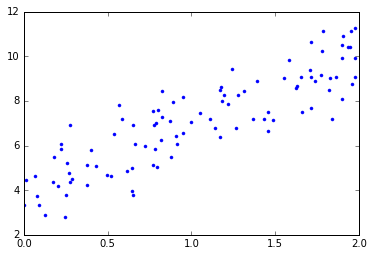

In [6]:
# 3x+4 + noise 를 데이터로 생성합니다.
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")

### 정규방정식을 사용한 선형회귀


In [16]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best


array([[3.97689397],
       [3.00231149]])

In [19]:
# 새로운 샘플에 대한 예측
X_new = np.array([[0],[2],[4]])
X_new_b = np.c_[np.ones((3,1)), X_new] # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best) 
y_predict

array([[ 3.97689397],
       [ 9.98151694],
       [15.98613991]])

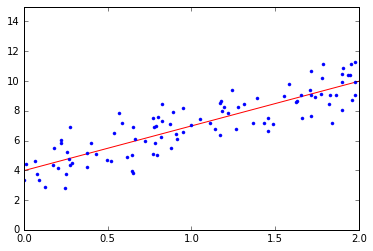

In [21]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

### 사이킷런을 이용한 선형 회귀

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("학습된 가중치와 절편 :")
print(lin_reg.intercept_, lin_reg.coef_, end="\n\n")
print("새로운 샘플에 대한 예측 :")
print(lin_reg.predict(X_new))

학습된 가중치와 절편 :
[3.97689397] [[3.00231149]]

새로운 샘플에 대한 예측 :
[[ 3.97689397]
 [ 9.98151694]
 [15.98613991]]


### 계산복잡도

#### 정규방정식

- 특성 수에 따라서는 역행렬을 계산하는데 걸리는 시간이 $O(n^{2.4})$ 에서 $O(n^3)$ 사이입니다.

#### 사이킷런으로 선형 회귀 수행

- SVD(특이값 분해) 방법은 $O(n^2)$ 입니다.

---